# MMC profiles for Phase 3

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd 
import numpy as np

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
tstart  = np.datetime64('2023-08-24T03:00')
t_5AM  = np.datetime64('2023-08-24T05:00')
t_7AM  = np.datetime64('2023-08-24T07:00')
tdeltas = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

In [3]:
# Open NetCDF files
ds_A1prof = xr.open_dataset('Phase2_Data/A1_profiling_lidar_10min.nc')
ds_A1scan = xr.open_dataset('Phase2_Data/A1_scanning_lidar_10min.nc')

# Open the NetCDF file
ds_temperature = xr.open_dataset('Phase2_Data/B_ASSIST.nc')

## Create WS/WD profiles

### A1 scanning lidar

In [4]:
# For scanner
A1scan_z     = ds_A1scan['height']
tvec         = ds_A1scan['time'].data

MMCdates     = []
A1scan_WS    = []
A1scan_WD    = []
A1scan_TKE   = []

for t in tdeltas:
    ttarget    = tstart + np.timedelta64(int(t*3600), 's')
    ttarget_m25 = ttarget - np.timedelta64(25, 'm')
    ttarget_p05 = ttarget + np.timedelta64(5, 'm')

    im25 = (np.where(tvec == ttarget_m25))[0][0]
    ip05 = (np.where(tvec == ttarget_p05))[0][0]

    WSm25 = ds_A1scan['WS'][im25, :]
    WSp05 = ds_A1scan['WS'][ip05, :]
    
    WDm25 = ds_A1scan['WD'][im25, :]
    WDp05 = ds_A1scan['WD'][ip05, :]

    TKEm25 = ds_A1scan['TKE'][im25, :]
    TKEp05 = ds_A1scan['TKE'][ip05, :]

    WStarget = (WSp05 - WSm25)/(30.0)*(25.0) + WSm25
    WDtarget = (WDp05 - WDm25)/(30.0)*(25.0) + WDm25
    TKEtarget = (TKEp05 - TKEm25)/(30.0)*(25.0) + TKEm25
    
    MMCdates.append(ttarget)
    A1scan_WS.append(WStarget)
    A1scan_WD.append(WDtarget)
    A1scan_TKE.append(TKEtarget)
    #print(ttarget_m25, ttarget, ttarget_p5)

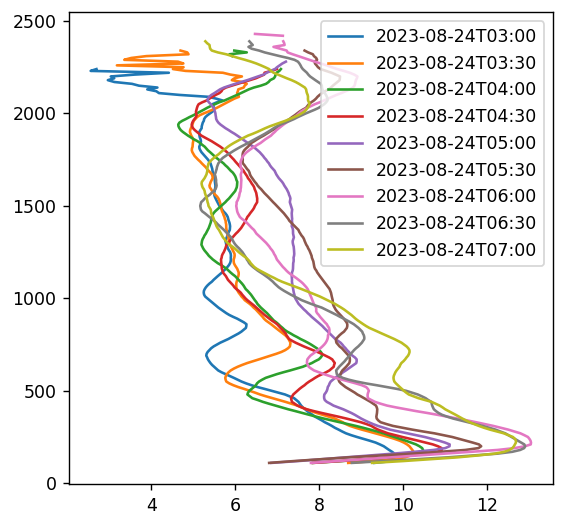

In [5]:
plt.figure(figsize=(5,5), dpi=125)
for iWS, WS in enumerate(A1scan_WS):
    plt.plot(WS, A1scan_z, label=str(MMCdates[iWS])[:16])
plt.legend()

(0.0, 2.0)

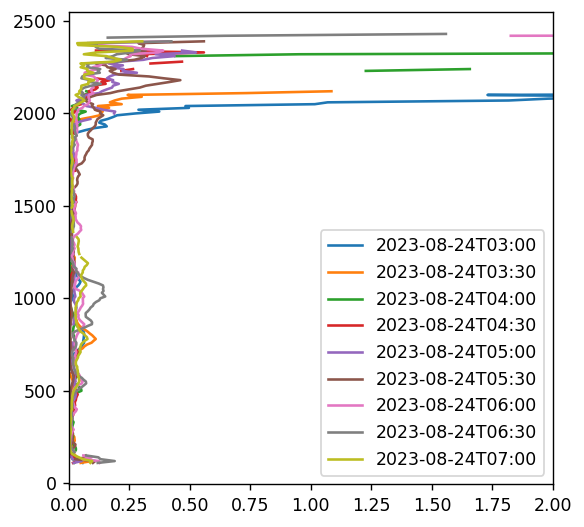

In [6]:
plt.figure(figsize=(5,5), dpi=125)
for iWS, TKE in enumerate(A1scan_TKE):
    plt.plot(TKE, A1scan_z, label=str(MMCdates[iWS])[:16])
plt.legend()
plt.xlim([0,2])

In [7]:
# Write data to arrays
Udat = np.array(A1scan_WS)
WDdat = np.array(A1scan_WD)
TKEdat = np.array(A1scan_TKE)

#Uheights = lds['U']['height'].values
timessec = (MMCdates-tstart)/np.timedelta64(1, 's')
writeFiles = True

# save the profile data and times
if writeFiles:
    np.savetxt('A1scan_WS1.dat', Udat)
    np.savetxt('A1scan_WD1.dat', WDdat)
    np.savetxt('A1scan_TKE1.dat', TKEdat)
    
    np.savetxt('A1scan_times1.dat', timessec)
    np.savetxt('A1scan_heights.dat', A1scan_z)

### A1 profiling lidar

In [8]:
# For scanner
A1prof_z     = ds_A1prof['height']
tvec         = ds_A1prof['time'].data

#MMCdates     = []
A1prof_WS    = []
A1prof_WD    = []

for t in tdeltas:
    ttarget    = tstart + np.timedelta64(int(t*3600), 's')
    ttarget_m05 = ttarget - np.timedelta64(5, 'm')
    ttarget_p05 = ttarget + np.timedelta64(5, 'm')

    im05 = (np.where(tvec == ttarget_m05))[0][0]
    ip05 = (np.where(tvec == ttarget_p05))[0][0]

    WSm05 = ds_A1prof['U'][im05, :]
    WSp05 = ds_A1prof['U'][ip05, :]
    
    WDm05 = ds_A1prof['WD'][im05, :]
    WDp05 = ds_A1prof['WD'][ip05, :]

    WStarget = (WSp05 - WSm05)/(10.0)*(5.0) + WSm05
    WDtarget = (WDp05 - WDm05)/(10.0)*(5.0) + WDm05

    A1prof_WS.append(WStarget)
    A1prof_WD.append(WDtarget)

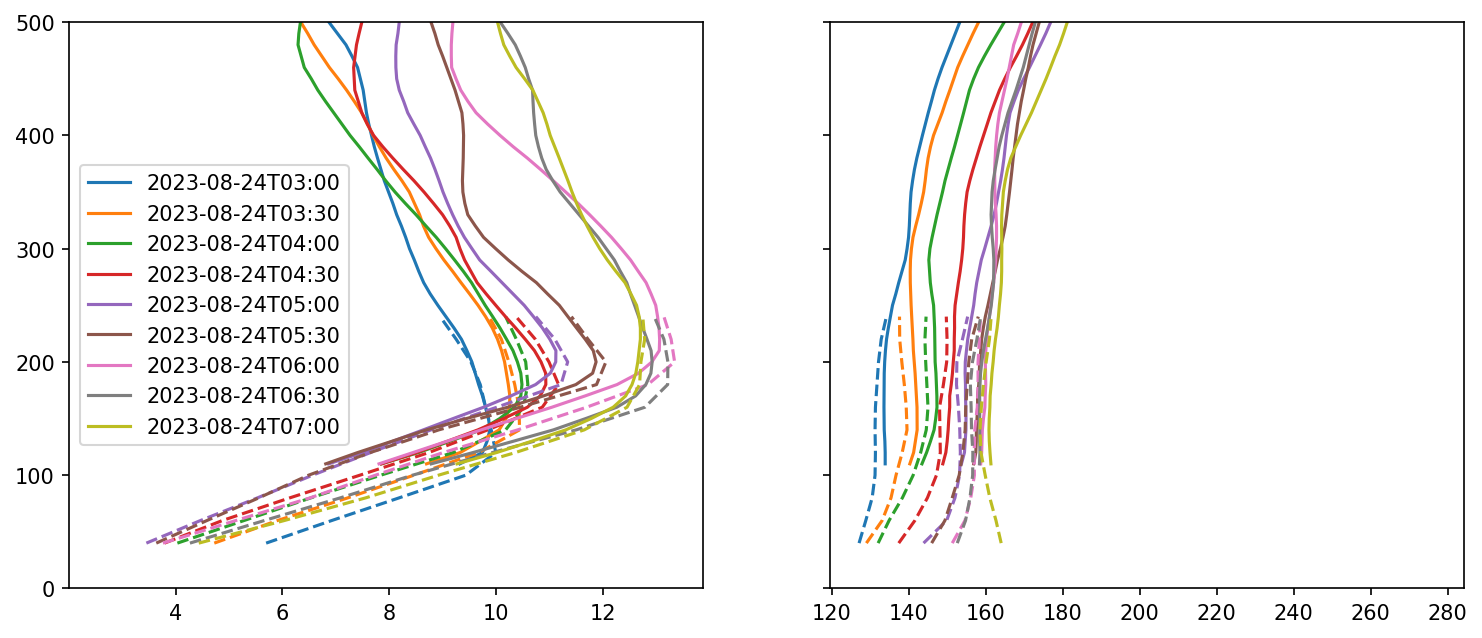

In [9]:
fig, axs=plt.subplots(1,2, figsize=(12,5), dpi=150, sharey=True)
for iWS, WS in enumerate(A1scan_WS):
    l = axs[0].plot(WS, A1scan_z, label=str(MMCdates[iWS])[:16])
    axs[0].plot(A1prof_WS[iWS], A1prof_z, color=l[0].get_color(), ls='--')

    axs[1].plot(A1scan_WD[iWS], A1scan_z, color=l[0].get_color(), ls='-')
    axs[1].plot(A1prof_WD[iWS], A1prof_z, color=l[0].get_color(), ls='--')

axs[0].legend()
for ax in axs:
    ax.set_ylim([0, 500])

In [10]:
# Write data to arrays
Udat = np.array(A1prof_WS)
WDdat = np.array(A1prof_WD)
#Uheights = lds['U']['height'].values
timessec = (MMCdates-tstart)/np.timedelta64(1, 's')
writeFiles = True

# save the profile data and times
if writeFiles:
    np.savetxt('A1prof_WS1.dat', Udat)
    np.savetxt('A1prof_WD1.dat', WDdat)
    np.savetxt('A1prof_times1.dat', timessec)
    np.savetxt('A1prof_heights.dat', A1prof_z)

## Create temperature profiles

In [11]:
Bassist_z = ds_temperature['temperature']['height'].values
tvec = ds_temperature['temperature']['time']

Bassist_T = []

for t in tdeltas:
    ttarget    = tstart + np.timedelta64(int(t*3600)+15, 's')
    i = (np.where(tvec == ttarget))[0][0]
    Tprof = ds_temperature['temperature'].values[i,:]
    Bassist_T.append(Tprof)

(295.0, 314.0)

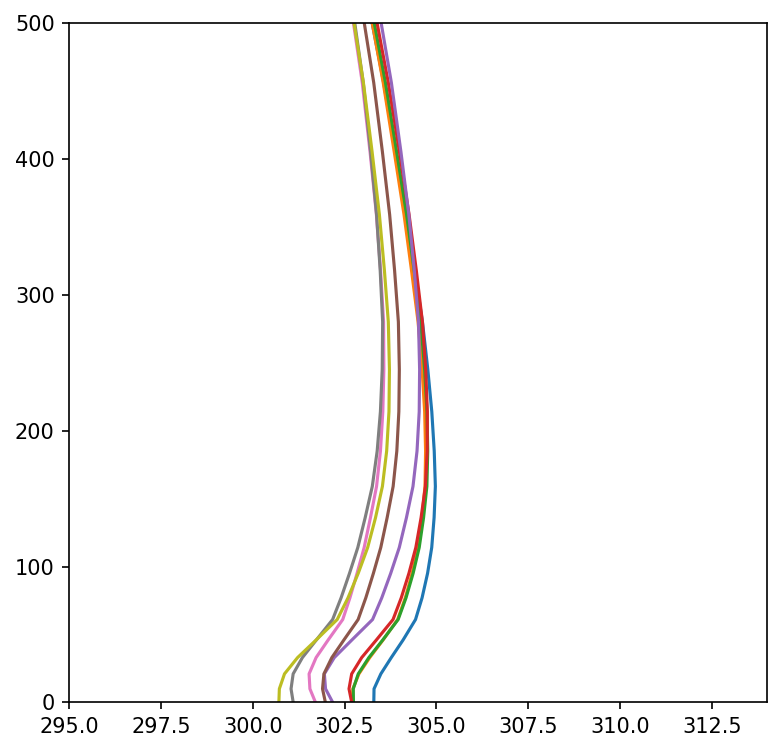

In [12]:
plt.figure(figsize=(6,6), dpi=150)
for iT, T in enumerate(Bassist_T):
    l = plt.plot(T+273.15, Bassist_z, label=str(MMCdates[iT])[:16])
plt.ylim([0, 500])
plt.xlim([295, 314])

In [13]:
# Write data to arrays
Tdat = np.array(Bassist_T)
writeFiles = True

# save the profile data and times
if writeFiles:
    np.savetxt('Bassist_T1.dat', Tdat)
    np.savetxt('Bassist_heights.dat', Bassist_z)

In [14]:
#raise ValueError('Stop here')